In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import glob
import missingno as msno
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud

In [ ]:
path = "/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/*.csv"
file_list = glob.glob(path)
print(file_list)

['/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-light_compressed.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-light_audio.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-light_exe.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-light_image.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-light_text.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-light_video.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-light_benign.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-heavy_audio.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-heavy_compressed.pcap.csv', '/content/drive/My Drive/CSVs/303PartB_WORK/Stateless/stateless_features-heavy_exe.pcap.csv', '/content/drive/My Drive/CSVs/303

In [ ]:
df = pd.DataFrame()
light_attack = pd.DataFrame()
light_benign = pd.DataFrame()
heavy_attack = pd.DataFrame()
heavy_benign = pd.DataFrame()
benign = pd.DataFrame()
for file in file_list:
  if "stateless_features-light" in file and not "stateless_features-light_benign" in file:
    temp_df = pd.read_csv(file)
    # print(file)
    light_attack = pd.concat([light_attack, temp_df], ignore_index=True)
    light_attack['origin'] = 'light_attack'
    light_attack['attack'] = 1
  elif "stateless_features-light_benign" in file:
    temp_df = pd.read_csv(file)
    # print(file)
    light_benign = pd.concat([light_benign, temp_df], ignore_index=True)
    light_benign['origin'] = 'light_benign'
    light_benign['attack'] = 0
  elif "stateless_features-heavy" in file and not "stateless_features-heavy_benign" in file:
    temp_df = pd.read_csv(file)
    # print(file)
    heavy_attack = pd.concat([heavy_attack, temp_df], ignore_index=True)
    heavy_attack['origin'] = 'heavy_attack'
    heavy_attack['attack'] = 1
  elif "stateless_features-benign_heavy" in file:
    temp_df = pd.read_csv(file)
    # print(file)
    heavy_benign = pd.concat([heavy_benign, temp_df], ignore_index=True)
    heavy_benign['origin'] = 'heavy_benign'
    heavy_benign['attack'] = 0
  else:
    temp_df = pd.read_csv(file)
    # print(file)
    benign = pd.concat([benign, temp_df], ignore_index=True)
    benign['origin'] = 'benign'
    benign['attack'] = 0
# benign
#print(light_attack)

In [ ]:
df = pd.concat([light_attack, light_benign, heavy_attack, heavy_benign, benign], ignore_index = True)
df

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,origin,attack
0,2020-11-21 22:09:06.308662,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,light_attack,1
1,2020-11-21 22:09:07.544415,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,light_attack,1
2,2020-11-21 22:09:07.955750,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,light_attack,1
3,2020-11-21 22:09:08.368081,28,11,0,10,12,2.205789,6,6,7,3.833333,9,239,15,1,light_attack,1
4,2020-11-21 22:09:08.778352,28,11,0,10,12,2.205789,6,6,7,3.833333,9,239,15,1,light_attack,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757206,2020-11-20 23:21:52.163381,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0
757207,2020-11-20 23:21:52.573906,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0
757208,2020-11-20 23:21:52.986831,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0
757209,2020-11-20 23:21:53.396946,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0


In [ ]:
#info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757211 entries, 0 to 757210
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         757211 non-null  object 
 1   FQDN_count        757211 non-null  int64  
 2   subdomain_length  757211 non-null  int64  
 3   upper             757211 non-null  int64  
 4   lower             757211 non-null  int64  
 5   numeric           757211 non-null  int64  
 6   entropy           757211 non-null  float64
 7   special           757211 non-null  int64  
 8   labels            757211 non-null  int64  
 9   labels_max        757211 non-null  int64  
 10  labels_average    757211 non-null  float64
 11  longest_word      757180 non-null  object 
 12  sld               757211 non-null  object 
 13  len               757211 non-null  int64  
 14  subdomain         757211 non-null  int64  
 15  origin            757211 non-null  object 
 16  attack            75

In [ ]:
print("Rows: ", len(df.index))
print("Columns: ", len(df.columns))
print("Number of cells: ",len(df.index)*len(df.columns))

Rows:  757211
Columns:  17
Number of cells:  12872587


In [ ]:
# finding duplicate rows
print(df.duplicated().sum())

526


In [ ]:
mask = df.duplicated()
print(df[mask])
# dropping the duplicated rows
df = df.drop_duplicates()
print(df.duplicated().sum())

                         timestamp  FQDN_count  subdomain_length  upper  \
4115    2020-11-21 22:49:26.179394           6                 0      0   
4123    2020-11-21 22:49:27.352357          32                 0     32   
6049    2020-11-21 23:08:37.878735          32                 0     32   
10215   2020-11-21 23:49:26.598607          32                 0     32   
13023   2020-11-21 19:41:01.447306          32                 0     32   
...                            ...         ...               ...    ...   
744160  2020-11-20 21:49:26.433232           6                 0      0   
745028  2020-11-20 21:52:52.338466          32                 0     32   
752819  2020-11-20 22:38:27.831867          32                 0     32   
755370  2020-11-20 23:03:40.158712          32                 0     32   
756921  2020-11-20 23:19:00.965042          32                 0     32   

        lower  numeric   entropy  special  labels  labels_max  labels_average  \
4115        6     

# Dealing with missing values

In [ ]:
# Find the amount of missing values in each column
print(df.isna().sum())
#printing the rows that contain missing values
print(df[df.isna().any(axis=1)])

timestamp            0
FQDN_count           0
subdomain_length     0
upper                0
lower                0
numeric              0
entropy              0
special              0
labels               0
labels_max           0
labels_average       0
longest_word        31
sld                  0
len                  0
subdomain            0
origin               0
attack               0
dtype: int64
                         timestamp  FQDN_count  subdomain_length  upper  \
73042   2020-11-21 16:16:29.036661           9                 0      0   
73044   2020-11-21 16:16:29.228023          13                 3      0   
82741   2020-11-21 16:55:23.213426          10                 0      0   
82742   2020-11-21 16:55:23.255911          10                 0      0   
394465  2020-11-23 17:43:35.075802          12                 0      0   
394467  2020-11-23 17:43:35.134209          12                 0      0   
394468  2020-11-23 17:43:35.357937          16                 3      0

<Axes: >

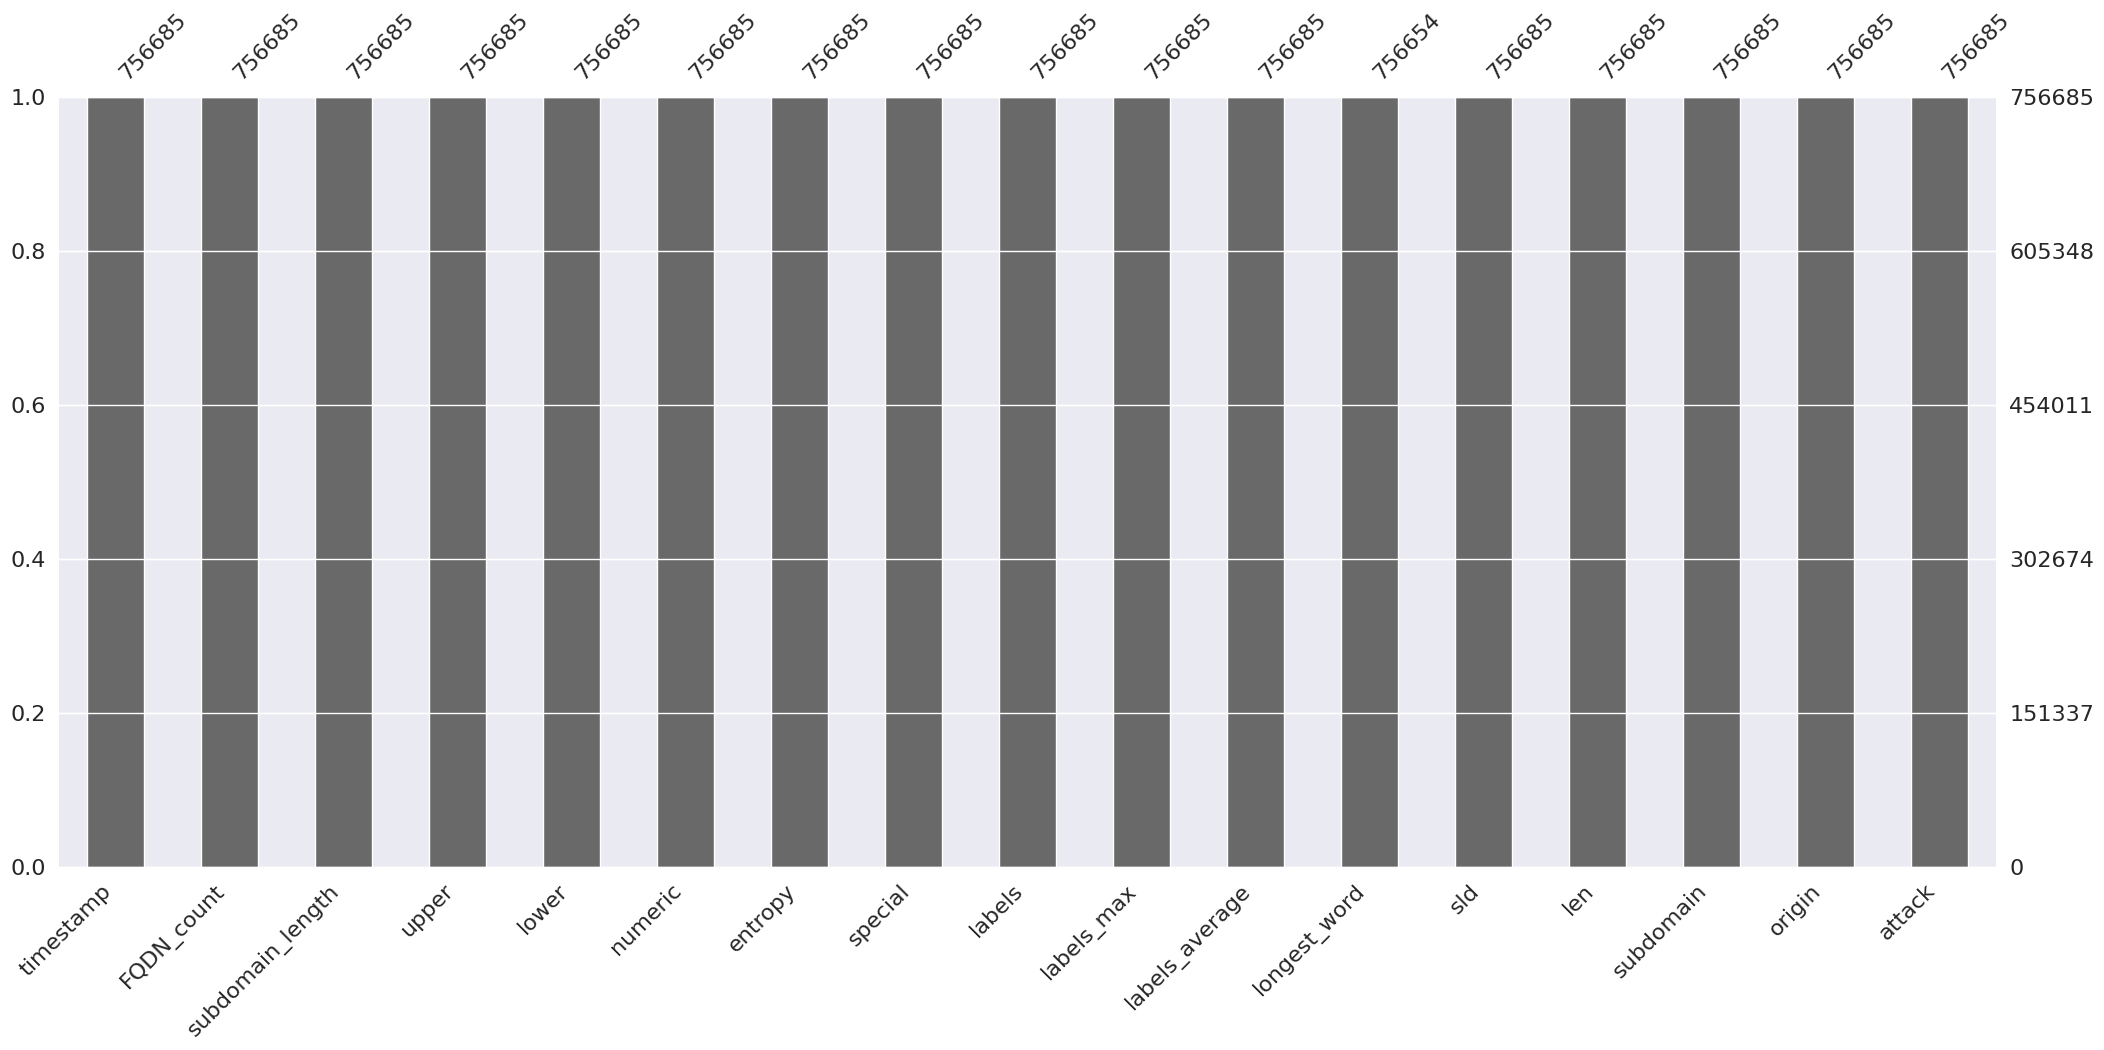

In [ ]:
msno.bar(df)

<Axes: >

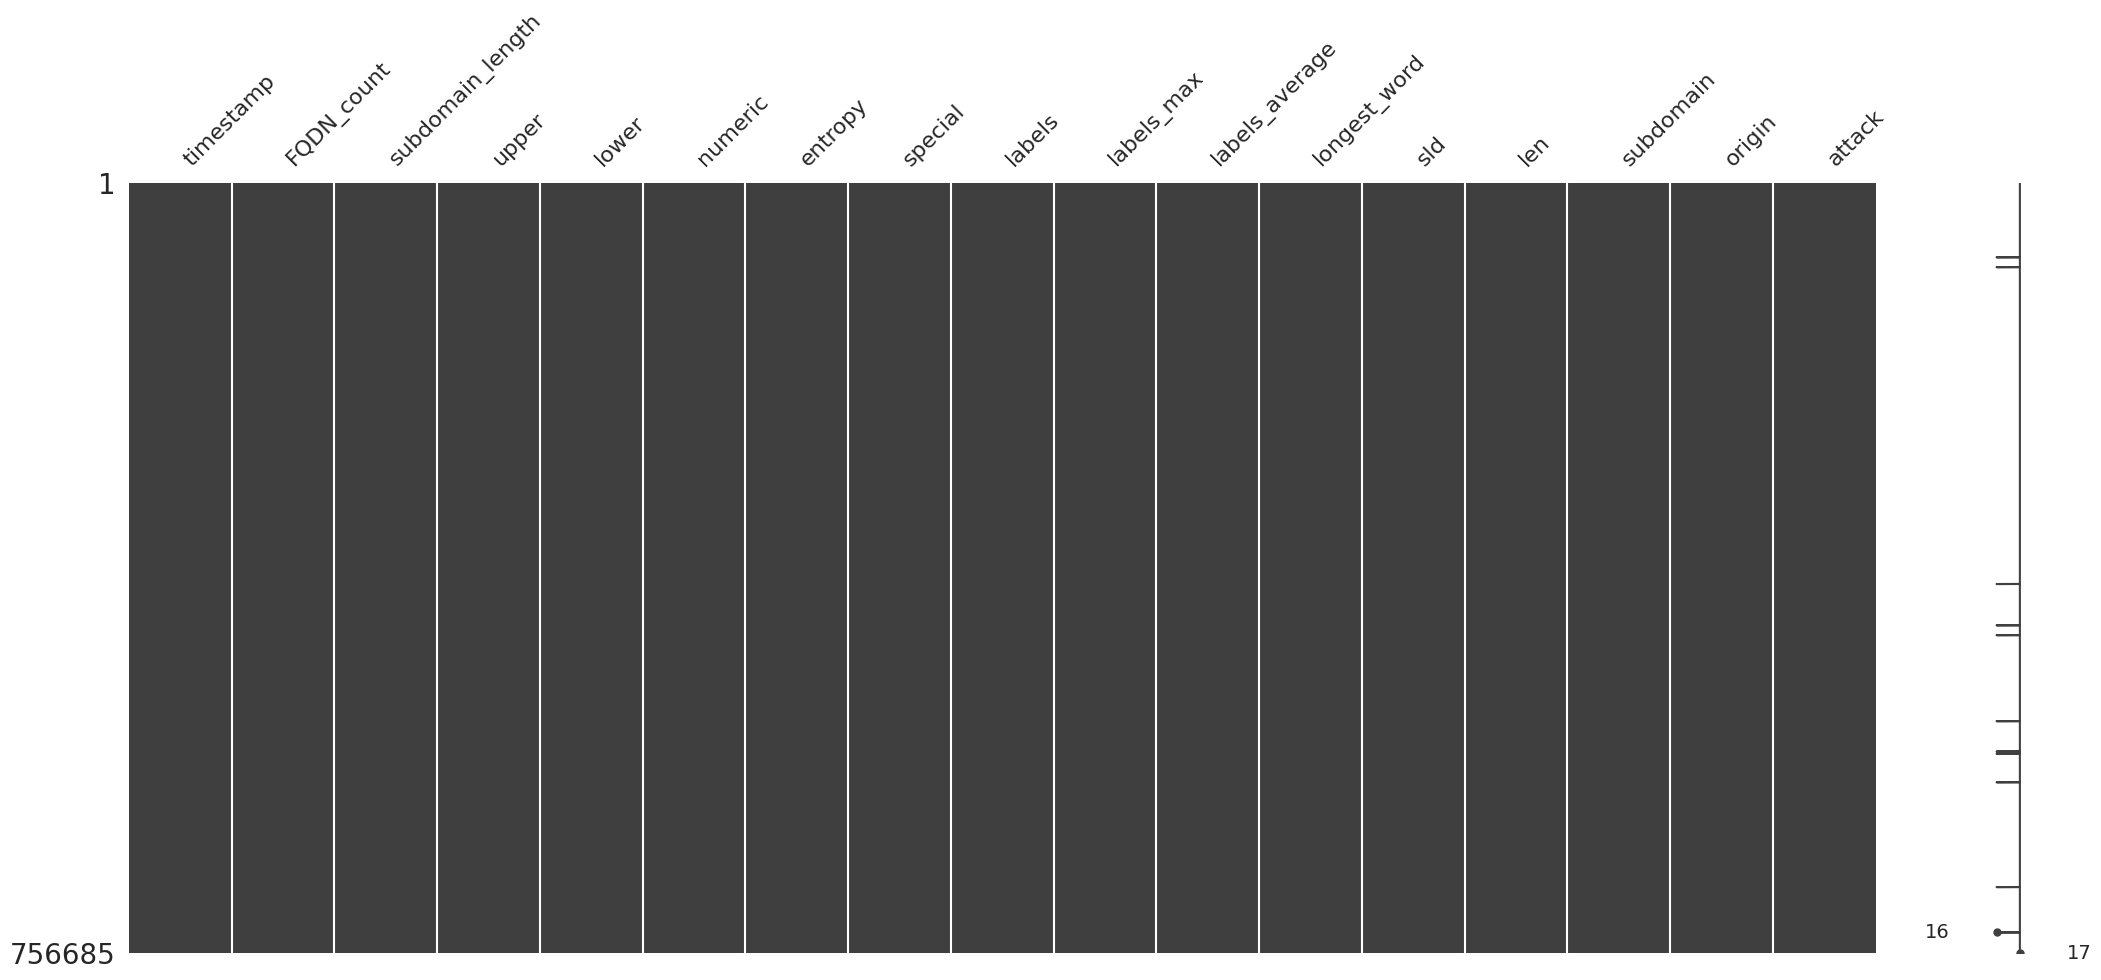

In [ ]:
msno.matrix(df)

<Axes: >

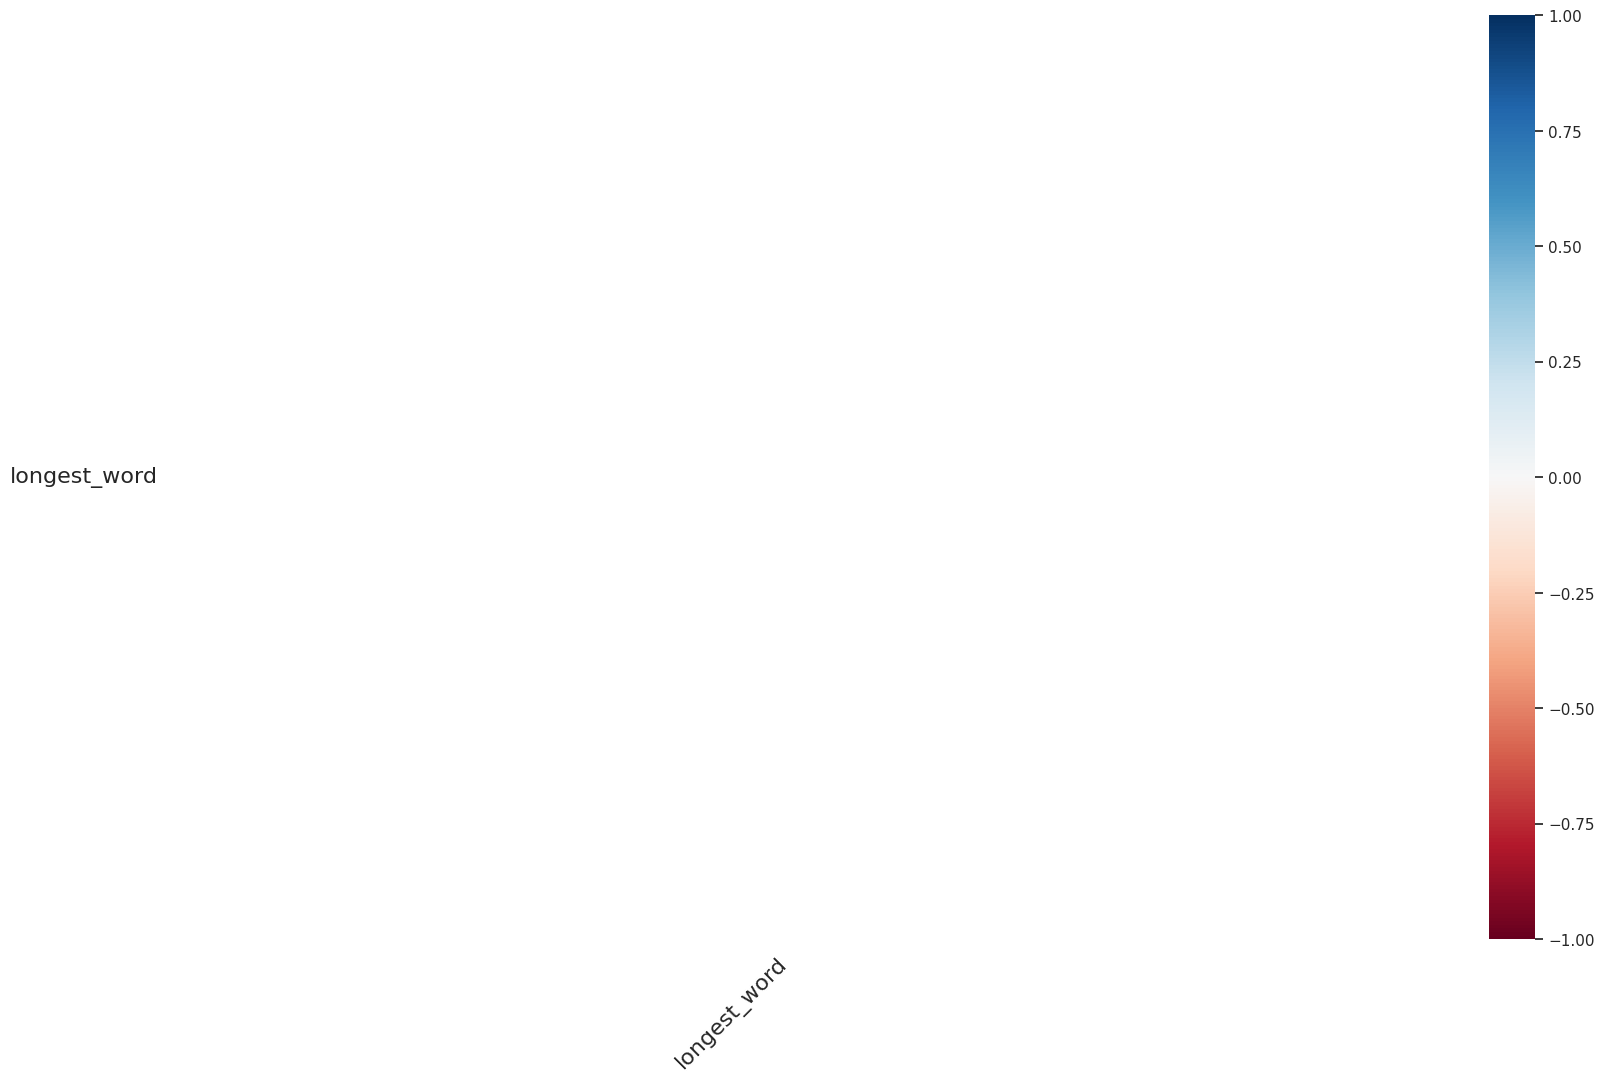

In [ ]:
#To show the correlation
msno.heatmap(df)


In [ ]:
# filling longest_word column with most frequent values
df = df.fillna("")
print(df.isna().sum())

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
origin              0
attack              0
dtype: int64


In [ ]:
# since the timestamp column contains unique values so we are dropping it
df.drop(columns=['timestamp'],inplace=True)
df
# df = pd.get_dummies(df)
# df.tail()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,origin,attack
0,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,light_attack,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,light_attack,1
2,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,light_attack,1
3,28,11,0,10,12,2.205789,6,6,7,3.833333,9,239,15,1,light_attack,1
4,28,11,0,10,12,2.205789,6,6,7,3.833333,9,239,15,1,light_attack,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757206,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0
757207,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0
757208,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0
757209,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756685 entries, 0 to 757210
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        756685 non-null  int64  
 1   subdomain_length  756685 non-null  int64  
 2   upper             756685 non-null  int64  
 3   lower             756685 non-null  int64  
 4   numeric           756685 non-null  int64  
 5   entropy           756685 non-null  float64
 6   special           756685 non-null  int64  
 7   labels            756685 non-null  int64  
 8   labels_max        756685 non-null  int64  
 9   labels_average    756685 non-null  float64
 10  longest_word      756685 non-null  object 
 11  sld               756685 non-null  object 
 12  len               756685 non-null  int64  
 13  subdomain         756685 non-null  int64  
 14  origin            756685 non-null  object 
 15  attack            756685 non-null  int64  
dtypes: float64(2), int64

EDA

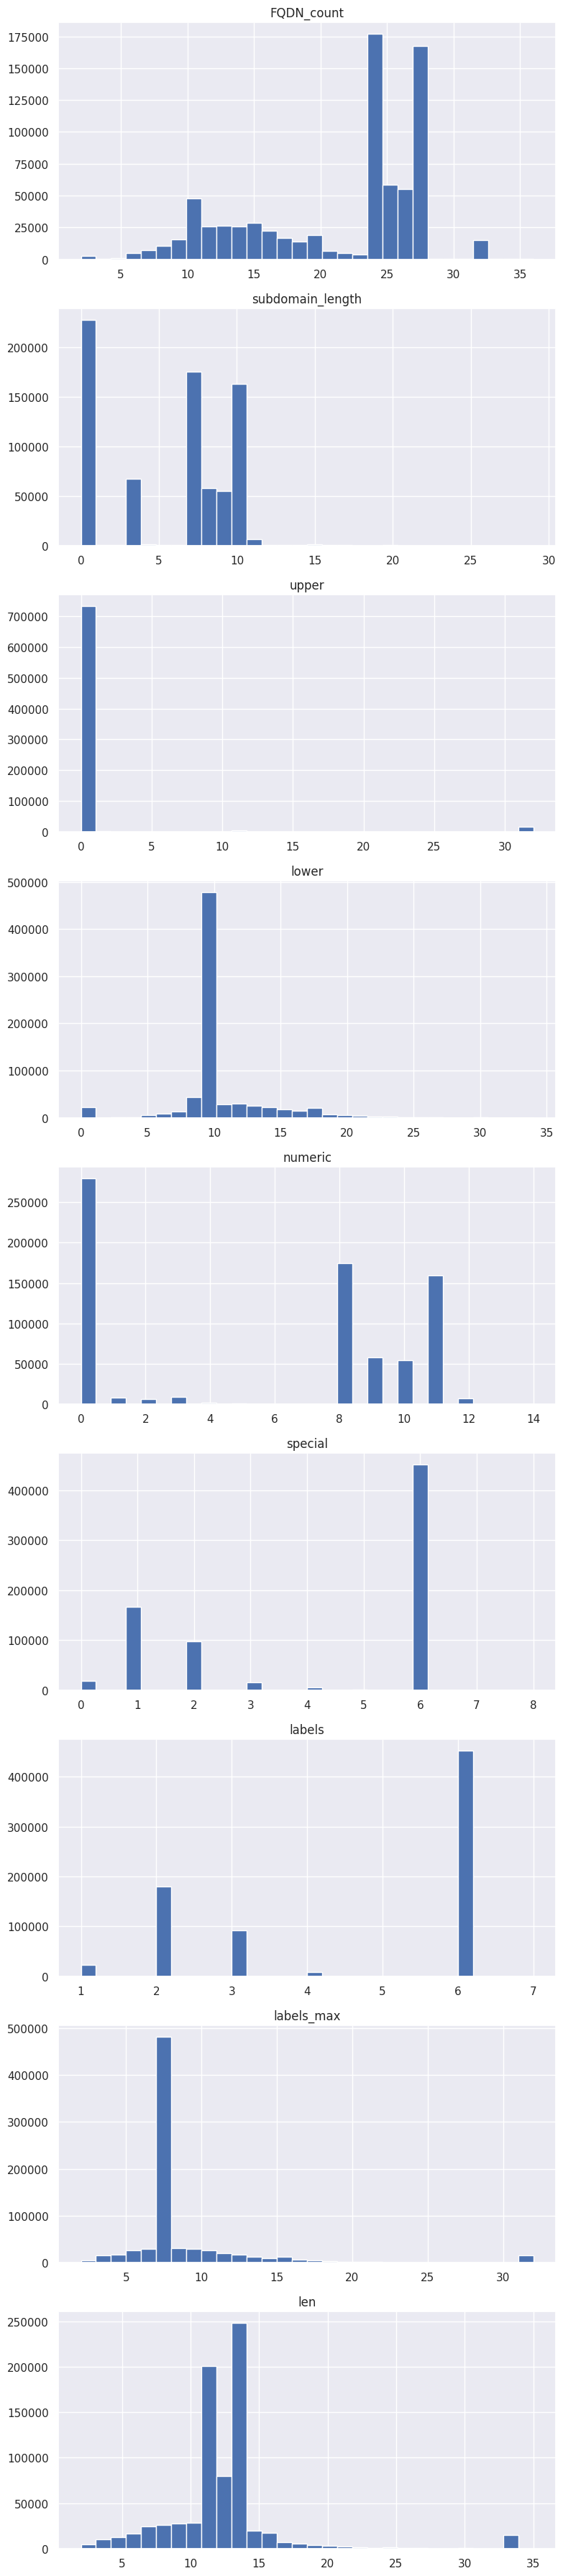

In [ ]:
# Visual distribution of descrete numerical values
bins = 30

cols_to_plot = [col for col in df.columns if df[col].dtype != 'object' and col not in [ "entropy", "labels_average", 'subdomain','attack']]

n_cols = len(cols_to_plot)
fig, axs = plt.subplots(nrows=n_cols, ncols=1, figsize=(8, n_cols*4))

for i, col in enumerate(cols_to_plot):
    axs[i].hist(df[col], bins=bins)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
for column in list(df.columns):
    if column in ["entropy", "labels_average", "longest_word", "sld", "subdomain","attack"]:
        continue
    display(pd.DataFrame(df[column].describe(percentiles=[i/100 for i in range (0, 100, 10)])).T)

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
FQDN_count,756685.0,21.202389,6.495161,2.0,2.0,11.0,14.0,17.0,24.0,24.0,24.0,26.0,27.0,27.0,36.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
subdomain_length,756685.0,5.450257,4.055561,0.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,8.0,10.0,10.0,29.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
upper,756685.0,0.719505,4.560207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
lower,756685.0,10.584254,3.359052,0.0,0.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,12.0,15.0,34.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
numeric,756685.0,5.738644,4.6989,0.0,0.0,0.0,0.0,0.0,4.0,8.0,8.0,9.0,11.0,11.0,14.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
special,756685.0,4.159986,2.295667,0.0,0.0,1.0,1.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,8.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
labels,756685.0,4.50553,1.867043,1.0,1.0,2.0,2.0,3.0,4.0,6.0,6.0,6.0,6.0,6.0,7.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
labels_max,756685.0,8.209443,4.27159,2.0,2.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,9.0,12.0,32.0


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
len,756685.0,12.248258,4.19546,2.0,2.0,8.0,11.0,11.0,11.0,12.0,13.0,14.0,14.0,15.0,35.0


,count,unique,top,freq
origin,756685,5,heavy_attack,251330


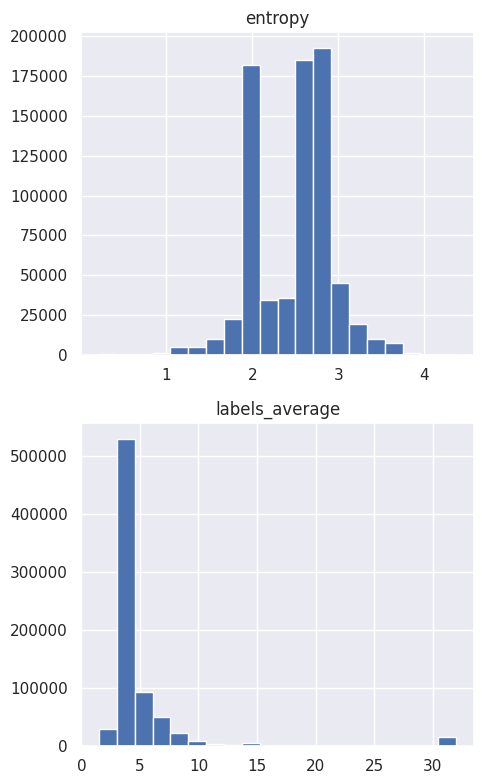

In [ ]:
# Visual distribution of continuous numerical values

bins = 20


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,8))

for i, col in enumerate(df[["entropy", "labels_average"]]):
    axs[i].hist(df[col], bins=bins)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
for column in list(["entropy", "labels_average"]):

    display(pd.DataFrame(df[column].describe(percentiles=[i/100 for i in range (0, 100, 10)])).T)

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
entropy,756685.0,2.481419,0.427097,0.219195,0.219195,2.054029,2.054029,2.12059,2.530857,2.570417,2.595489,2.742338,2.767195,2.952882,4.368167


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
labels_average,756685.0,4.812816,4.26541,1.5,1.5,3.166667,3.166667,3.333333,3.5,3.666667,3.666667,4.0,5.333333,7.0,32.0


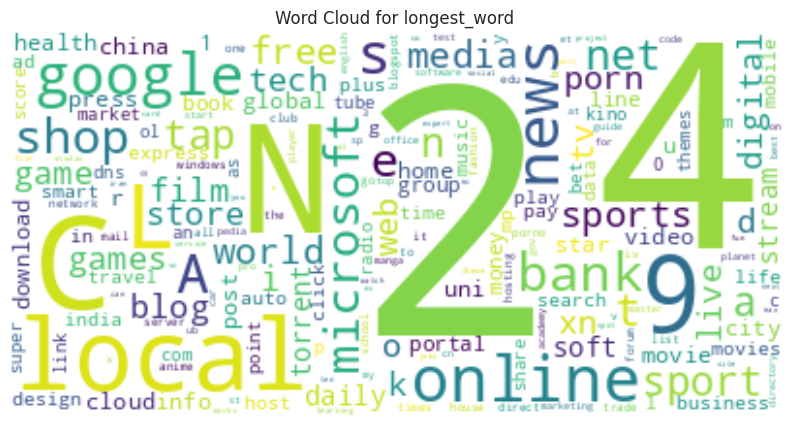

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(str(word for word in df.longest_word)))

plt.figure(figsize = (10,10))
plt.imshow(word_cloud.generate_from_frequencies(dict(df["longest_word"].value_counts(dropna=False))), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for longest_word ", fontsize=12)
plt.show()

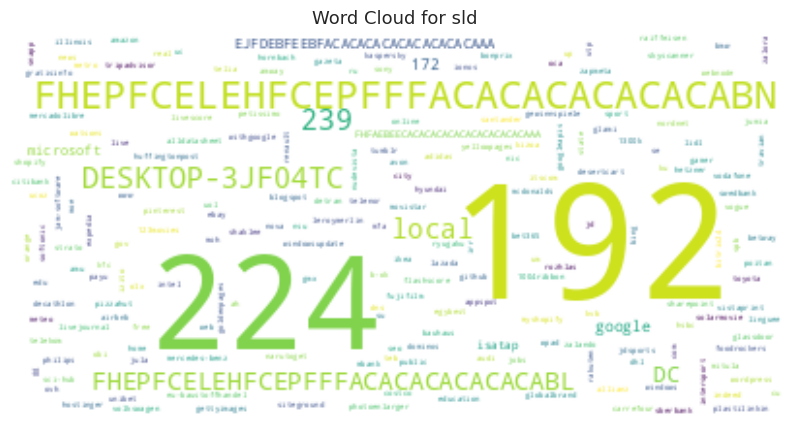

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(word_cloud.generate_from_frequencies(dict(df["sld"].value_counts(dropna=False))), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for sld ", fontsize=13)
plt.show()

In [ ]:
# encoding the categorical columns longest_word and sld
cols_to_encode = ['longest_word', 'sld']
df['longest_word'] = df['longest_word'].astype(str)
df['sld'] = df['sld'].astype(str)
df['attack'] = df['attack'].astype(int)
# df['attack'] = df['attack'].astype(str)
# create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# fit and transform the selected columns
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])
# df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756685 entries, 0 to 757210
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        756685 non-null  int64  
 1   subdomain_length  756685 non-null  int64  
 2   upper             756685 non-null  int64  
 3   lower             756685 non-null  int64  
 4   numeric           756685 non-null  int64  
 5   entropy           756685 non-null  float64
 6   special           756685 non-null  int64  
 7   labels            756685 non-null  int64  
 8   labels_max        756685 non-null  int64  
 9   labels_average    756685 non-null  float64
 10  longest_word      756685 non-null  float64
 11  sld               756685 non-null  float64
 12  len               756685 non-null  int64  
 13  subdomain         756685 non-null  int64  
 14  origin            756685 non-null  object 
 15  attack            756685 non-null  int64  
dtypes: float64(4), int64

In [ ]:
# scaling
cols_to_keep = ['longest_word', 'sld', 'attack', 'origin']

# create a dataframe with the columns you want to scale
df_to_scale = df.drop(columns=cols_to_keep)
print(df_to_scale.columns)
# apply standard scaling to the dataframe
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)

# create a new dataframe with the scaled data and the columns you kept
df_scaled = pd.DataFrame(scaled_data, columns=df_to_scale.columns)
df_scaled[cols_to_keep] = df[cols_to_keep]
# df_scaled.fillna(0)
print(df_scaled.isna().sum())
# df = df.drop('attack', axis=1)
df_scaled.info()
df_scaled

Index(['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len',
       'subdomain'],
      dtype='object')
FQDN_count            0
subdomain_length      0
upper                 0
lower                 0
numeric               0
entropy               0
special               0
labels                0
labels_max            0
labels_average        0
len                   0
subdomain             0
longest_word        525
sld                 525
attack              525
origin              525
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756685 entries, 0 to 756684
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        756685 non-null  float64
 1   subdomain_length  756685 non-null  float64
 2   upper             756685 non-null  float64
 3   lower             756685 non-null  float64
 4   numeric 

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,longest_word,sld,attack,origin
0,0.584683,0.628703,-0.157779,-0.173934,0.694068,0.176125,0.801517,0.800448,-0.283137,-0.346856,-0.059173,0.655872,3.0,311.0,1.0,light_attack
1,0.430723,0.382128,-0.157779,-0.173934,0.481252,-1.000688,0.801517,0.800448,-0.283137,-0.385930,-0.297526,0.655872,5.0,479.0,1.0,light_attack
2,0.430723,0.382128,-0.157779,-0.173934,0.481252,-1.000688,0.801517,0.800448,-0.283137,-0.385930,-0.297526,0.655872,5.0,479.0,1.0,light_attack
3,1.046566,1.368429,-0.157779,-0.173934,1.332516,-0.645359,0.801517,0.800448,-0.283137,-0.229634,0.655886,0.655872,10.0,495.0,1.0,light_attack
4,1.046566,1.368429,-0.157779,-0.173934,1.332516,-0.645359,0.801517,0.800448,-0.283137,-0.229634,0.655886,0.655872,10.0,495.0,1.0,light_attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756680,0.892605,1.121854,-0.157779,-0.173934,1.119700,0.208379,0.801517,0.800448,-0.283137,-0.268708,0.417533,0.655872,5.0,479.0,0.0,benign
756681,0.892605,1.121854,-0.157779,-0.173934,1.119700,0.208379,0.801517,0.800448,-0.283137,-0.268708,0.417533,0.655872,3.0,311.0,0.0,benign
756682,0.892605,1.121854,-0.157779,-0.173934,1.119700,0.208379,0.801517,0.800448,-0.283137,-0.268708,0.417533,0.655872,3.0,311.0,0.0,benign
756683,0.892605,1.121854,-0.157779,-0.173934,1.119700,0.208379,0.801517,0.800448,-0.283137,-0.268708,0.417533,0.655872,5.0,479.0,0.0,benign


In [ ]:
df_scaled.fillna(0, inplace = True)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756685 entries, 0 to 756684
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        756685 non-null  float64
 1   subdomain_length  756685 non-null  float64
 2   upper             756685 non-null  float64
 3   lower             756685 non-null  float64
 4   numeric           756685 non-null  float64
 5   entropy           756685 non-null  float64
 6   special           756685 non-null  float64
 7   labels            756685 non-null  float64
 8   labels_max        756685 non-null  float64
 9   labels_average    756685 non-null  float64
 10  len               756685 non-null  float64
 11  subdomain         756685 non-null  float64
 12  longest_word      756685 non-null  float64
 13  sld               756685 non-null  float64
 14  attack            756685 non-null  float64
 15  origin            756685 non-null  object 
dtypes: float64(15), obje

# Visualization of column relationship

<ipython-input-27-35274ea45d9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_scaled.corr()


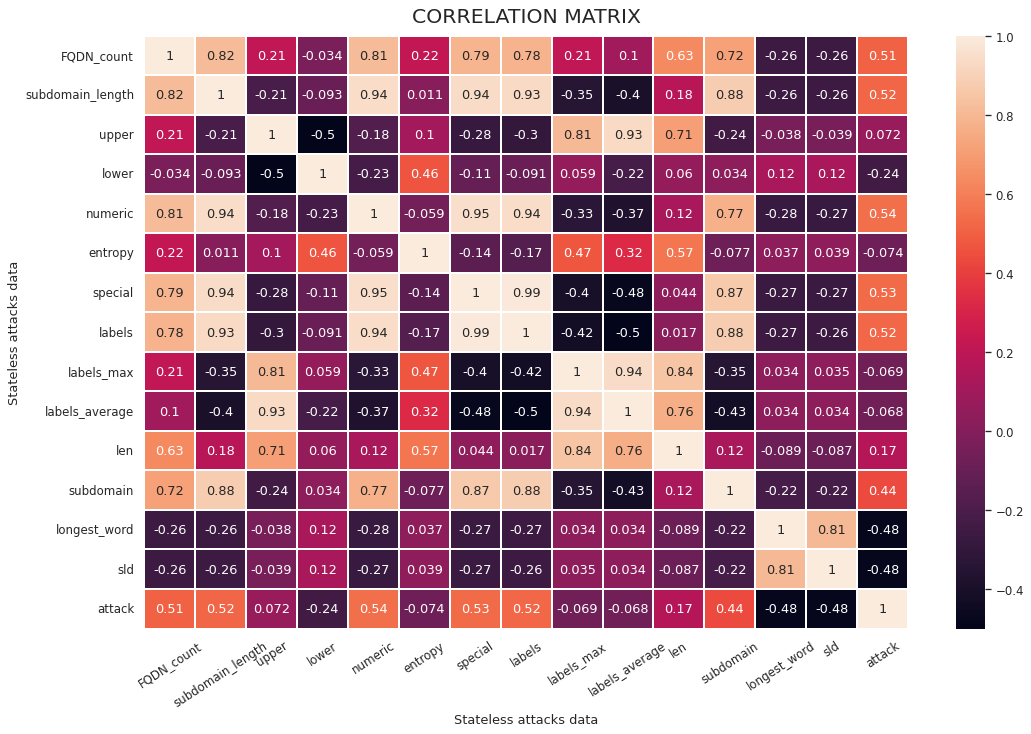

In [ ]:
correlation = df_scaled.corr()

plt.figure(figsize=(16,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Stateless attacks data')
plt.ylabel('Stateless attacks data')
plt.xticks(rotation=33)
plt.show()

# Machine Learning Models

In [ ]:
# train test splitting the data frame
from sklearn.model_selection import train_test_split
# # df_scaled = df_scaled.drop("origin", axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(['attack'], axis=1), df_scaled['attack'], test_size=0.2, random_state=42)
# print("hh",type(X_train), type(y_train))

# # dropping the origin column from train and test
# test_origin = X_test['origin']
# X_train = X_train.drop(columns=['origin'], inplace = True)
# X_test = X_test.drop(columns=['origin'], inplace = True)
# # X_test = X_test['origin'].drop(inplace = True)
# print("hh",type(X_train), type(y_train))
# df_scaled.info()
# type(test_origin)

train_df, test_df = train_test_split(df_scaled, test_size=0.2, random_state=42)

X_train =  train_df.drop(columns=['attack', 'origin'], axis=1)
y_train = train_df["attack"]

X_test =  test_df.drop(columns=['attack', 'origin'], axis=1)
y_test = test_df["attack"]

test_origin = test_df['origin']
X_train.info()
test_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605348 entries, 639580 to 121958
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        605348 non-null  float64
 1   subdomain_length  605348 non-null  float64
 2   upper             605348 non-null  float64
 3   lower             605348 non-null  float64
 4   numeric           605348 non-null  float64
 5   entropy           605348 non-null  float64
 6   special           605348 non-null  float64
 7   labels            605348 non-null  float64
 8   labels_max        605348 non-null  float64
 9   labels_average    605348 non-null  float64
 10  len               605348 non-null  float64
 11  subdomain         605348 non-null  float64
 12  longest_word      605348 non-null  float64
 13  sld               605348 non-null  float64
dtypes: float64(14)
memory usage: 69.3 MB
<class 'pandas.core.series.Series'>
Int64Index: 151337 entries, 287479 to 

# Overall Attack Classification
# Random Forest

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     92636
         1.0       0.79      1.00      0.88     58701

    accuracy                           0.89    151337
   macro avg       0.89      0.91      0.89    151337
weighted avg       0.92      0.89      0.90    151337



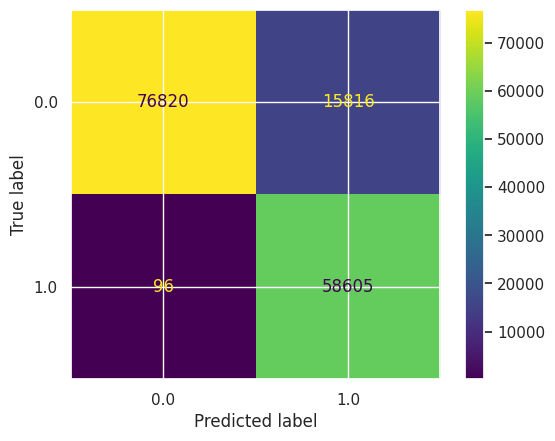

In [ ]:
#  Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


# classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

In [ ]:
# merging X_test and y_test and creating a test dataframe
df_test = pd.concat([X_test, y_test], axis=1)
df_test = pd.concat([df_test, test_origin], axis = 1)
df_test['predictions'] = y_pred
df_test

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,longest_word,sld,attack,origin,predictions
287479,0.430723,0.382128,-0.157779,-0.173934,0.481252,-1.000688,0.801517,0.800448,-0.283137,-0.385930,-0.297526,0.655872,5.0,479.0,1.0,heavy_attack,1.0
557554,0.430723,0.382128,-0.157779,-0.173934,0.481252,-1.000688,0.801517,0.800448,-0.283137,-0.385930,-0.297526,0.655872,5347.0,41370.0,0.0,benign,0.0
90806,0.430723,0.382128,-0.157779,-0.173934,0.481252,-1.000688,0.801517,0.800448,-0.283137,-0.385930,-0.297526,0.655872,1615.0,7239.0,0.0,light_benign,0.0
254510,0.738644,0.875278,-0.157779,-0.173934,0.906884,0.610912,0.801517,0.800448,-0.283137,-0.307782,0.179180,0.655872,3.0,311.0,1.0,heavy_attack,1.0
207063,0.430723,0.382128,-0.157779,-0.173934,0.481252,-1.000688,0.801517,0.800448,-0.283137,-0.385930,-0.297526,0.655872,5.0,479.0,1.0,heavy_attack,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66364,-1.108886,-1.343898,-0.157779,0.421472,-1.221275,1.127849,-0.940897,-1.341979,0.419179,0.395550,-0.297526,-1.524687,4446.0,16376.0,0.0,light_benign,0.0
679898,0.892605,1.121854,-0.157779,-0.173934,1.119700,0.208379,0.801517,0.800448,-0.283137,-0.268708,0.417533,0.655872,3.0,311.0,0.0,benign,1.0
419790,0.892605,1.121854,-0.157779,-0.173934,1.119700,0.208379,0.801517,0.800448,-0.283137,-0.268708,0.417533,0.655872,15556.0,5395.0,0.0,heavy_benign,0.0
421096,-1.724730,-1.343898,-0.157779,-0.769341,-1.221275,-2.297886,-0.940897,-0.806372,-1.219557,-0.503152,-1.965997,-1.524687,17622.0,3321.0,0.0,heavy_benign,0.0


# Light Attack Result

In [ ]:
temp = df_test[(df_test["origin"]=="light_attack") | (df_test["origin"]=="light_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.999507,0.845711,0.916200,11984.000000
1.0,0.820328,0.999408,0.901057,8447.000000
accuracy,0.909256,0.909256,0.909256,0.909256
macro avg,0.909918,0.922560,0.908628,20431.000000
weighted avg,0.925427,0.909256,0.909939,20431.000000


# Heavy Attack Result

In [ ]:
temp = df_test[(df_test["origin"]=="heavy_attack") | (df_test["origin"]=="heavy_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.997023,0.836651,0.909824,36425.000000
1.0,0.893964,0.998189,0.943206,50254.000000
accuracy,0.930306,0.930306,0.930306,0.930306
macro avg,0.945493,0.917420,0.926515,86679.000000
weighted avg,0.937272,0.930306,0.929178,86679.000000


# Overall Attack Classification
# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89     92636
         1.0       0.77      0.96      0.86     58701

    accuracy                           0.88    151337
   macro avg       0.87      0.89      0.87    151337
weighted avg       0.89      0.88      0.88    151337



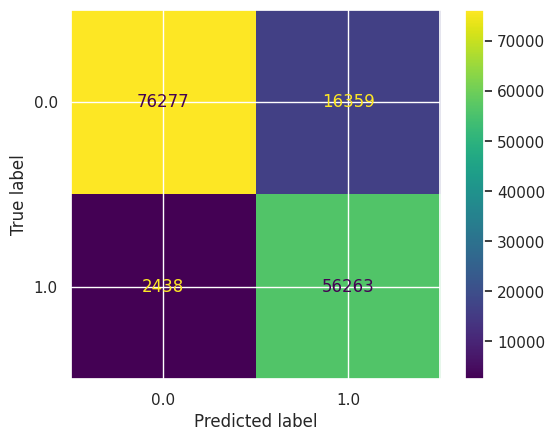

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
# print(y_pred)

# classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()

In [ ]:
df_test['predictions'] = y_pred

# Light Attack Result

In [ ]:
temp = df_test[(df_test["origin"]=="light_attack") | (df_test["origin"]=="light_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.972629,0.842123,0.902683,11984.000000
1.0,0.811835,0.966379,0.882391,8447.000000
accuracy,0.893495,0.893495,0.893495,0.893495
macro avg,0.892232,0.904251,0.892537,20431.000000
weighted avg,0.906150,0.893495,0.894294,20431.000000


# Heavy Attack Result

In [ ]:
temp = df_test[(df_test["origin"]=="heavy_attack") | (df_test["origin"]=="heavy_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.933625,0.831791,0.879771,36425.000000
1.0,0.887012,0.957138,0.920742,50254.000000
accuracy,0.904464,0.904464,0.904464,0.904464
macro avg,0.910319,0.894465,0.900256,86679.000000
weighted avg,0.906600,0.904464,0.903525,86679.000000


# Tuning the parameters for Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     92636
         1.0       0.78      0.93      0.85     58701

    accuracy                           0.87    151337
   macro avg       0.87      0.88      0.87    151337
weighted avg       0.89      0.87      0.87    151337



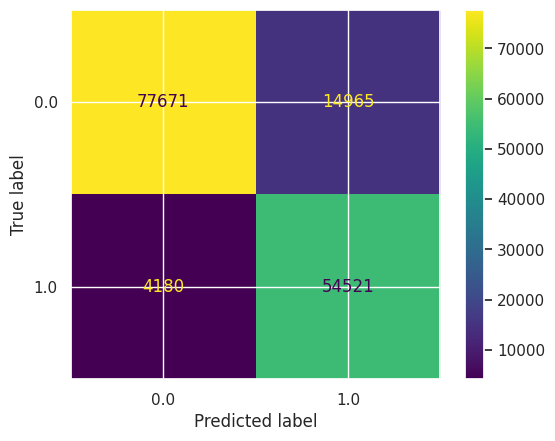

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=1000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
# print(y_pred)

# classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()

In [ ]:

df_test['predictions'] = y_pred


# Light Attack Result

In [ ]:
temp = df_test[(df_test["origin"]=="light_attack") | (df_test["origin"]=="light_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.950890,0.856308,0.901124,11984.000000
1.0,0.821351,0.937256,0.875484,8447.000000
accuracy,0.889775,0.889775,0.889775,0.889775
macro avg,0.886120,0.896782,0.888304,20431.000000
weighted avg,0.897333,0.889775,0.890523,20431.000000


#Heavy Attack Result

In [ ]:
temp = df_test[(df_test["origin"]=="heavy_attack") | (df_test["origin"]=="heavy_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.894148,0.846452,0.869646,36425.000000
1.0,0.892848,0.927369,0.909781,50254.000000
accuracy,0.893365,0.893365,0.893365,0.893365
macro avg,0.893498,0.886910,0.889714,86679.000000
weighted avg,0.893394,0.893365,0.892915,86679.000000


              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90     92636
         1.0       0.79      0.98      0.87     58701

    accuracy                           0.89    151337
   macro avg       0.89      0.91      0.89    151337
weighted avg       0.91      0.89      0.89    151337



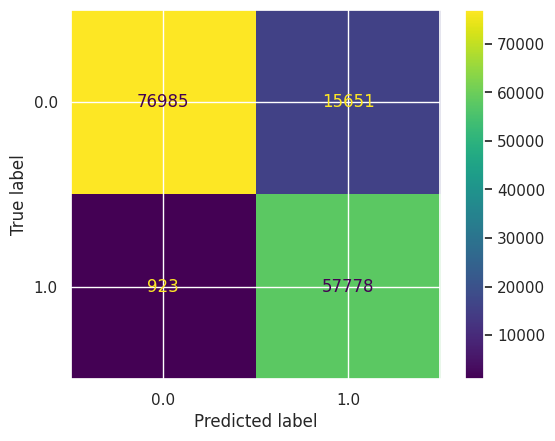

In [ ]:
#random forest with parameters
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

In [ ]:

df_test['predictions'] = y_pred


# Light Attck Result

In [ ]:
temp = df_test[(df_test["origin"]=="light_attack") | (df_test["origin"]=="light_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.990841,0.848548,0.914191,11984.000000
1.0,0.821499,0.988872,0.897448,8447.000000
accuracy,0.906564,0.906564,0.906564,0.906564
macro avg,0.906170,0.918710,0.905819,20431.000000
weighted avg,0.920828,0.906564,0.907269,20431.000000


# Heavy Attck Result

In [ ]:
temp = df_test[(df_test["origin"]=="heavy_attack") | (df_test["origin"]=="heavy_benign")]
display(pd.DataFrame(classification_report(temp['attack'], temp['predictions'], output_dict=True)).T)

,precision,recall,f1-score,support
0.0,0.973583,0.838765,0.901159,36425.00000
1.0,0.893794,0.983504,0.936505,50254.00000
accuracy,0.922680,0.922680,0.922680,0.92268
macro avg,0.933688,0.911134,0.918832,86679.00000
weighted avg,0.927323,0.922680,0.921652,86679.00000


# K Fold Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X = df_scaled.drop(['origin', 'attack'], axis=1)
y = df_scaled['attack']

kf = KFold(n_splits=5, shuffle=True, random_state=42)


clf = RandomForestClassifier()
for fold, (train_indices, val_indices) in enumerate(kf.split(X, y)):
    print("Fold:", fold+1)

    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    print(classification_report(y_val, y_pred))


Fold: 1
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     92636
         1.0       0.79      1.00      0.88     58701

    accuracy                           0.89    151337
   macro avg       0.89      0.91      0.89    151337
weighted avg       0.92      0.89      0.90    151337

Fold: 2
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     92652
         1.0       0.79      1.00      0.88     58685

    accuracy                           0.89    151337
   macro avg       0.89      0.91      0.89    151337
weighted avg       0.92      0.89      0.90    151337

Fold: 3
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     92630
         1.0       0.79      1.00      0.88     58707

    accuracy                           0.90    151337
   macro avg       0.89      0.91      0.89    151337
weighted avg       0.92      0.90      0.90    151

# Performance Evaluation and Discussions
Some evaluations of overall attack classification of different models are discussed below:

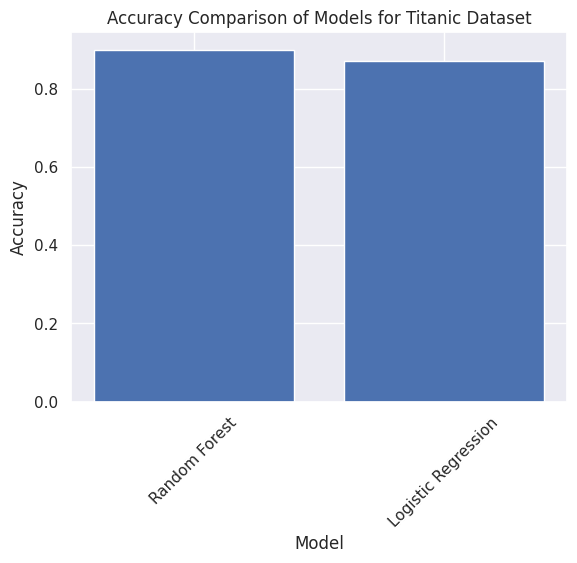

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest','Logistic Regression']
accuracies = [0.90, 0.87]

plt.bar(models, accuracies)
plt.title('Accuracy Comparison of Models for Titanic Dataset')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

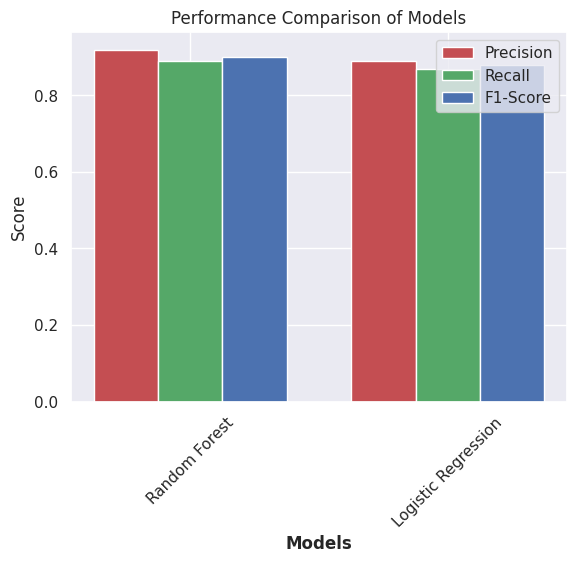

In [ ]:
models = ['Random Forest','Logistic Regression']
precision = [0.92, 0.89]
recall = [0.89, 0.87]
f1_score = [0.90, 0.88]

barWidth = 0.25

r1 = [0, 1]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='r', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, recall, color='g', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, f1_score, color='b', width=barWidth, edgecolor='white', label='F1-Score')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=45)

plt.ylabel('Score')
plt.title('Performance Comparison of Models')

plt.legend()

plt.show()